In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cupcakes vs Muffins.csv")

In [3]:
data.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [4]:
ingredients = data[['Flour','Sugar']].values

In [5]:
type_label = np.where(data['Type']=='Muffin',0,1)

In [6]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [7]:
def prediction(flour, sugar):
    if(model.predict([[flour, sugar]])==0):
        print("You're looking at a Muffin recipe")
    else:
        print("You're looking at a Cupcake recipe")

prediction(input('Enter the flour quantity: '), input('Enter the sugar quantity: '))

Enter the flour quantity:  50
Enter the sugar quantity:  30


You're looking at a Muffin recipe


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


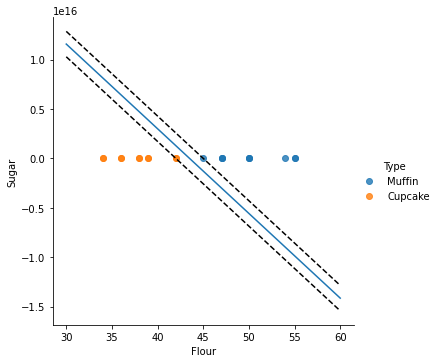

In [8]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

margin=1/np.sqrt(np.sum(model.coef_**2))
yy_down=yy-np.sqrt(1+a**2)*margin
yy_up=yy+np.sqrt(1+a**2)*margin

sns.lmplot("Flour","Sugar",data,hue="Type",fit_reg=False)
plt.plot(xx,yy)
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Quantity 1:  50
Quantity 2:  30


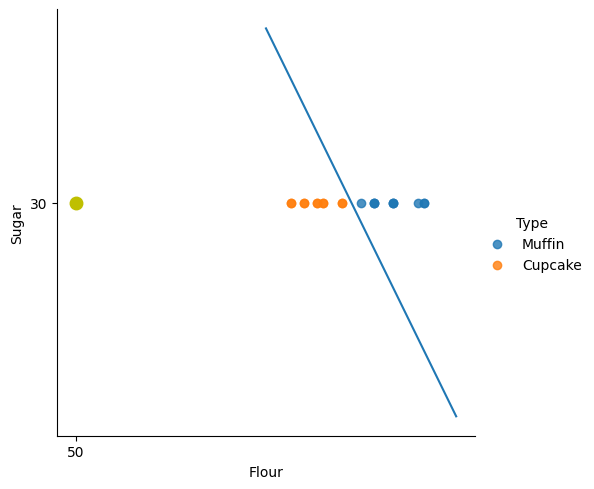

In [9]:
sns.lmplot("Flour","Sugar",data,hue="Type",fit_reg=False)
plt.plot(xx,yy)
plt.plot(input("Quantity 1: "),input("Quantity 2: "),'yo',markersize=9)